# NLP Workshop- ML India



## Understanding Transformers


In this session, we will be having an indepth overview of what Transformers are and how simply we can use them for any sentiment analysis or any language modelling task in general. Tre traditional methods of deep learning ,using LSTM variants for processing data in the form of sequential networks has underwent a severe modification and forms the current building blocks of all the SOTA transformer models that we see today. In this case, we will start will traditional neural networks to understand how they work and then try to build a simple transformer using those building blocks. Once that is completed, we will be leveraging state of the art open source libraries for our use case. Keeping the transformer architecture for reference,which we will be visiting again as we progress. 


<img src="https://miro.medium.com/max/500/1*do7YDFF2sads0p9BnjzrWA.png">





In the first section we will be using simple neural networks for our use case. We will be understanding about the traditional LSTM and Recurrent Neural Networks.




# Basics of Neural Networks

In this scope, we will be looking into standard neural networks with very little modifications and minimalistic codebase. For simplicity we will be using Keras Framework:

<img src="https://keras.io/img/logo.png">

# Building a Bare Minimal Neural Network 

Here, we will be building a stand-alonw neural network model just for classifying the labels to the respective questions. For this we will be using RNNs/LSTMs/GRU for our usecase. A classic LSTM based network is one of the most fundamental building blocks of all the robust architectures that we see today.For the first part we will be focussing on standard RNNs. Some resources for RNNs:

- [NLP](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop-2)
- [RNN](https://www.kaggle.com/abhilash1910/nlp-workshop-ml-india)


<img src="https://miro.medium.com/max/875/1*n-IgHZM5baBUjq0T7RYDBw.gif">


## Recurrent Neural Networks

Recurrent neural networks (RNN) are a class of neural networks that is powerful for modeling sequence data such as time series or natural language.Schematically, a RNN layer uses a for loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far. Forward pass of Classical RNNs have the following formula :


## Forward Pass Formula 


 For the hidden gates: <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/06005300/eq2.png">
 
 For the output gate: <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/06005750/outeq.png">
 
 
Generally for the output of the forward pass, we generally use a softmax activation on the output.


## Backward Pass Equations and BPTT

[Backpropagation Through Time](http://www.wildml.com/2015/10/recurrent-neural-networks-tutorial-part-3-backpropagation-through-time-and-vanishing-gradients/) is done in RNNs which allows flow of gradients through each hidden time step. The effective loss function for RNNs is : 

<img src="http://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D++E_t%28y_t%2C+%5Chat%7By%7D_t%29+%26%3D+-+y_%7Bt%7D+%5Clog+%5Chat%7By%7D_%7Bt%7D+%5C%5C++E%28y%2C+%5Chat%7By%7D%29+%26%3D%5Csum%5Climits_%7Bt%7D+E_t%28y_t%2C%5Chat%7By%7D_t%29+%5C%5C++%26+%3D+-%5Csum%5Climits_%7Bt%7D+y_%7Bt%7D+%5Clog+%5Chat%7By%7D_%7Bt%7D++%5Cend%7Baligned%7D++&bg=ffffff&fg=000&s=0">


our goal is to calculate the gradients of the error with respect to our parameters U, V and W and then learn good parameters using Stochastic Gradient Descent. Just like we sum up the errors, we also sum up the gradients at each time step for one training example: <img src="http://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Cpartial+E%7D%7B%5Cpartial+W%7D+%3D+%5Csum%5Climits_%7Bt%7D+%5Cfrac%7B%5Cpartial+E_t%7D%7B%5Cpartial+W%7D&bg=ffffff&fg=000&s=1">

To calculate these gradients we use the chain rule of differentiation. That’s the backpropagation algorithm when applied backwards starting from the error. For the rest of this post we’ll use E_3 as an example, just to have concrete numbers to work with.

<img src="http://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D++%5Cfrac%7B%5Cpartial+E_3%7D%7B%5Cpartial+V%7D+%26%3D%5Cfrac%7B%5Cpartial+E_3%7D%7B%5Cpartial+%5Chat%7By%7D_3%7D%5Cfrac%7B%5Cpartial%5Chat%7By%7D_3%7D%7B%5Cpartial+V%7D%5C%5C++%26%3D%5Cfrac%7B%5Cpartial+E_3%7D%7B%5Cpartial+%5Chat%7By%7D_3%7D%5Cfrac%7B%5Cpartial%5Chat%7By%7D_3%7D%7B%5Cpartial+z_3%7D%5Cfrac%7B%5Cpartial+z_3%7D%7B%5Cpartial+V%7D%5C%5C++%26%3D%28%5Chat%7By%7D_3+-+y_3%29+%5Cotimes+s_3+%5C%5C++%5Cend%7Baligned%7D++&bg=ffffff&fg=000&s=0">


Effectively the logic behind the chain rule is denoted by the following formula:
<img src="http://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D++%5Cfrac%7B%5Cpartial+E_3%7D%7B%5Cpartial+W%7D+%26%3D+%5Csum%5Climits_%7Bk%3D0%7D%5E%7B3%7D+%5Cfrac%7B%5Cpartial+E_3%7D%7B%5Cpartial+%5Chat%7By%7D_3%7D%5Cfrac%7B%5Cpartial%5Chat%7By%7D_3%7D%7B%5Cpartial+s_3%7D%5Cfrac%7B%5Cpartial+s_3%7D%7B%5Cpartial+s_k%7D%5Cfrac%7B%5Cpartial+s_k%7D%7B%5Cpartial+W%7D%5C%5C++%5Cend%7Baligned%7D++&bg=ffffff&fg=000&s=0">


BPTT can be understood clearly with this image


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBrnLrCdE0ae14fv4Wc7ThY61Ikr6lzsyJSQ&usqp=CAU">



## Classical RNN image


A classic RNN consists of the following image:


<img src="https://miro.medium.com/max/627/1*go8PHsPNbbV6qRiwpUQ5BQ.png">


Some resources:
    
- [Blog](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/)
- [Video](https://youtu.be/-eBjweSRgFc)
- [Blog](https://towardsdatascience.com/under-the-hood-of-neural-networks-part-2-recurrent-af091247ba78)
- [Blog](https://www.analyticsvidhya.com/blog/2017/12/introduction-to-recurrent-neural-networks/)
- [Documentation](https://keras.io/api/layers/recurrent_layers/simple_rnn/)

## Drawbacks of RNNs


Vanishing Gradients: The chain rule of differentiation of the weight vectors often lead to shrinkage in the change in the weights of the gradients for each iteration. This leads to  a slower convergence and many times it leads to an oscillation around local minimas. The chain rule formula: <img src="http://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D++%5Cfrac%7B%5Cpartial+E_3%7D%7B%5Cpartial+W%7D+%26%3D+%5Csum%5Climits_%7Bk%3D0%7D%5E%7B3%7D+%5Cfrac%7B%5Cpartial+E_3%7D%7B%5Cpartial+%5Chat%7By%7D_3%7D%5Cfrac%7B%5Cpartial%5Chat%7By%7D_3%7D%7B%5Cpartial+s_3%7D%5Cfrac%7B%5Cpartial+s_3%7D%7B%5Cpartial+s_k%7D%5Cfrac%7B%5Cpartial+s_k%7D%7B%5Cpartial+W%7D%5C%5C++%5Cend%7Baligned%7D++&bg=ffffff&fg=000&s=0">

Note that <img src="http://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Cpartial+s_3%7D%7B%5Cpartial+s_k%7D+&bg=ffffff&fg=000&s=1">  is a chain rule in itself! For example, <img src="http://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Cpartial+s_3%7D%7B%5Cpartial+s_1%7D+%3D%5Cfrac%7B%5Cpartial+s_3%7D%7B%5Cpartial+s_2%7D%5Cfrac%7B%5Cpartial+s_2%7D%7B%5Cpartial+s_1%7D&bg=ffffff&fg=000&s=1">. Also note that because we are taking the derivative of a vector function with respect to a vector, the result is a matrix (called the Jacobian matrix) whose elements are all the pointwise derivatives. We can rewrite the above gradient:

<img src="http://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D++%5Cfrac%7B%5Cpartial+E_3%7D%7B%5Cpartial+W%7D+%26%3D+%5Csum%5Climits_%7Bk%3D0%7D%5E%7B3%7D+%5Cfrac%7B%5Cpartial+E_3%7D%7B%5Cpartial+%5Chat%7By%7D_3%7D%5Cfrac%7B%5Cpartial%5Chat%7By%7D_3%7D%7B%5Cpartial+s_3%7D++%5Cleft%28%5Cprod%5Climits_%7Bj%3Dk%2B1%7D%5E%7B3%7D++%5Cfrac%7B%5Cpartial+s_j%7D%7B%5Cpartial+s_%7Bj-1%7D%7D%5Cright%29++%5Cfrac%7B%5Cpartial+s_k%7D%7B%5Cpartial+W%7D%5C%5C++%5Cend%7Baligned%7D++&bg=ffffff&fg=000&s=0">

Exploding Gradients: The chain rule (mainly due to tanh activation) often leads to overshooting of the gradient weights.This may lead to gradients which are really large at each iteration of the training process.



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_df=pd.read_csv('../input/google-quest-challenge/train.csv')
train_df.head()

## Articulating the Problem statement

In the Google Quest QA challenge we will be using 'question_body' and 'category' and build a classifier (sentiment) and test the performance on this discriminative dataset. Along with this, we will be focussing later,on how to create appropriate answers from the questions using Transformers. For the initial aspects, we will be focussing on how to create simple models and encoder decoders.

In [ ]:
import transformers
from transformers import AutoTokenizer,AutoModelForQuestionAnswering
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tokenizers import BertWordPieceTokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D,GlobalMaxPool1D,SimpleRNN
from keras.optimizers import Adam
import numpy as np  
import pandas as pd 
import keras.backend as k
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional,GRU
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [ ]:
#This is used to label encode the labels for categorization
from sklearn.preprocessing import LabelEncoder
label_y= LabelEncoder()
labels=label_y.fit_transform(train_df['category'])
labels

In [ ]:
#Important parameters when using without pretrained embeddings
maxlen=1000
max_features=5000 
embed_size=768


#Desing a simple model
#Layers:
#1.Input
#2.Embedding
#3.Simple RNN- With Bidirectionality to increase efficiency
#4.GlobalMaxPooling (optional)
#5.Dense Layer with Relu activation
#6.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,input_length=maxlen)(inp)
z=Bidirectional(SimpleRNN(60,return_sequences='True'))(z)
z=GlobalMaxPool1D()(z)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_RNN.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=2,validation_data=(val_x,val_y))

## Model Architecture

The model architecture for the Bidirectional Simple RNN can be seen as below:

<img src="https://i.imgur.com/QFsESSn.png">

In [ ]:
#Using Glove Embeddings, In this case, we will be using pretrained Glove 200dimension embeddings.
#The importance of using pretrained embeddings is to allow more semantic references of the word/sentence vectors.
from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
maxlen=1000
max_features=5000 
embed_size=768

train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

EMBEDDING_FILE = '../input/glove-global-vectors-for-word-representation/glove.6B.200d.txt'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
plt.plot(embedding_matrix[10])

In [ ]:
#Important parameters when using with pretrained Glove 200d embeddings
maxlen=1000
max_features=5000 
embed_size=200


#Desing a simple model
#Layers:
#1.Input
#2.Embedding -with pretrained glove weights
#3.Simple RNN- With Bidirectionality to increase efficiency
#4.GlobalMaxPooling (optional)
#5.Dense Layer with Relu activation
#6.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,weights=[embedding_matrix])(inp)
z=Bidirectional(SimpleRNN(60,return_sequences='True'))(z)
z=GlobalMaxPool1D()(z)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_RNN_Glove200d.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=2,validation_data=(val_x,val_y))

## Simple RNN with Glove200D pretrained embeddings

The model architecture can be shown as below:

<img src="https://i.imgur.com/3ZBQApl.png">

# LSTM- Long Short Term Memory

[LSTMs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) are gated recurrent networks having 4 gates with (tanh/sigmoid) activation units. These architectures are the the building blocks of all the transformer architectures that we see, and the 4 gates combine input from different time stamps to produce the output. In a LSTM, there are typically 3 input and output signals: The h (hidden cell output from the previous timestep), c (the signal from previous cell), and the x(input vectors). Outputs involve the updated ht+1(hidden cell output of current block) value, ct+1, (updated c signal from the present cell) and the output(o).


<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">


## Operation Steps - LSTM

The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the “forget gate layer.” It looks at ht−1 and xt, and outputs a number between 0 and 1 for each number in the cell state Ct−1. A 1 represents “completely keep this” while a 0 represents “completely get rid of this.”

Let’s go back to our example of a language model trying to predict the next word based on all the previous ones. In such a problem, the cell state might include the gender of the present subject, so that the correct pronouns can be used. When we see a new subject, we want to forget the gender of the old subject.


<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png"> 


The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the “input gate layer” decides which values we’ll update. Next, a tanh layer creates a vector of new candidate values, C~t, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

In the example of our language model, we’d want to add the gender of the new subject to the cell state, to replace the old one we’re forgetting.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png">

It’s now time to update the old cell state, Ct−1, into the new cell state Ct. The previous steps already decided what to do, we just need to actually do it.

We multiply the old state by ft, forgetting the things we decided to forget earlier. Then we add it∗C~t. This is the new candidate values, scaled by how much we decided to update each state value.

In the case of the language model, this is where we’d actually drop the information about the old subject’s gender and add the new information, as we decided in the previous steps.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png">

Finally, we need to decide what we’re going to output. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. Then, we put the cell state through tanh (to push the values to be between −1 and 1) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

For the language model example, since it just saw a subject, it might want to output information relevant to a verb, in case that’s what is coming next. For example, it might output whether the subject is singular or plural, so that we know what form a verb should be conjugated into if that’s what follows next.


<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png">



Resources:

- [NLP](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop-2)
- [Paper](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43905.pdf)

In [ ]:
#Important parameters when using without pretrained embeddings

maxlen=1000
max_features=5000 
embed_size=768


inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,input_length=maxlen)(inp)
z=Bidirectional(LSTM(60,return_sequences='True'))(z)
z=GlobalMaxPool1D()(z)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_LSTM.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x
#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)
model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=2,validation_data=(val_x,val_y))

## LSTM model architecture


The model architecture can be shown as below:


<img src="https://i.imgur.com/81b4WSd.png">

## LSTM model with embeddings

Now we will be applying the glove embeddings (200d) for boosting performance (if any).

In [ ]:
#Important parameters when using with pretrained Glove 200d embeddings
maxlen=1000
max_features=5000 
embed_size=200


#Desing a simple model
#Layers:
#1.Input
#2.Embedding -with pretrained glove weights
#3.Simple RNN- With Bidirectionality to increase efficiency
#4.GlobalMaxPooling (optional)
#5.Dense Layer with Relu activation
#6.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,weights=[embedding_matrix])(inp)
z=Bidirectional(LSTM(60,return_sequences='True'))(z)
z=GlobalMaxPool1D()(z)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_LSTM_Glove200d.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=2,validation_data=(val_x,val_y))

## LSTM with Glove Embedding Architecture

The model architecture is as follows:

<img src="https://i.imgur.com/oOmKx56.png">

## Gated Recurrent Units

[GRUs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) A slightly more dramatic variation on the LSTM is the Gated Recurrent Unit, or GRU, introduced by Cho, et al. (2014). It combines the forget and input gates into a single “update gate.” It also merges the cell state and hidden state, and makes some other changes. The resulting model is simpler than standard LSTM models, and has been growing increasingly popular.


<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png">

In [ ]:
#Important parameters when using without pretrained embeddings
maxlen=1000
max_features=5000 
embed_size=768


#Desing a simple model
#Layers:
#1.Input
#2.Embedding
#3.Simple LSTM- With Bidirectionality to increase efficiency
#4.GlobalMaxPooling (optional)
#5.Dense Layer with Relu activation
#6.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,input_length=maxlen)(inp)
z=Bidirectional(GRU(60,return_sequences='True'))(z)
z=GlobalMaxPool1D()(z)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_GRU.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=2,validation_data=(val_x,val_y))

## Model Architecture for vanilla GRU

The model architecture is as follows:

<img src="https://i.imgur.com/jaZegBX.png">

# Conclusion of Basics of Neural Network Models

We have seen a glimpse of LSTM/GRU along with Simple RNNs and also saw how to create a very simple classification neural network model with minimal lines of code , that too along with pretrained glove embeddings. Now we will be going into understanding about Transformer architectures.

# Understanding Attention Mechanism

[Attention mechanism](https://arxiv.org/abs/1706.03762) is the most important aspect in language modelling. There are many variants of attention such as Bahdanau Attention, Luong Attention, Dot Product Attention,Self Attention. A detailed description of the attention mechanism is provided in this [kernel](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop-2)


## Bahdanau Attention


<img src="https://miro.medium.com/max/639/1*qhOlQHLdtfZORIXYuoCtaA.png">


Bahdanau et al. proposed an attention mechanism that learns to align and translate jointly. It is also known as Additive attention as it performs a linear combination of encoder states and the decoder states.

let’s understand the Attention mechanism suggested by Bahdanau

All hidden states of the encoder(forward and backward) and the decoder are used to generate the context vector, unlike how just the last encoder hidden state is used in seq2seq without attention.
The attention mechanism aligns the input and output sequences, with an alignment score parameterized by a feed-forward network. It helps to pay attention to the most relevant information in the source sequence.
The model predicts a target word based on the context vectors associated with the source position and the previously generated target words.
Alignment Score
The alignment score maps how well the inputs around position “j” and the output at position “i” match. The score is based on the previous decoder’s hidden state, s₍ᵢ₋₁₎ just before predicting the target word and the hidden state, hⱼ of the input sentence.


<img src="https://miro.medium.com/max/535/1*u2YdTRPjN34Fpr-zxvoJsg.png">


The decoder decides which part of the source sentence it needs to pay attention to, instead of having encoder encode all the information of the source sentence into a fixed-length vector. The alignment vector that has the same length with the source sequence and is computed at every time step of the decode.

Attention Weights
We apply a softmax activation function to the alignment scores to obtain the attention weights.


<img src="https://miro.medium.com/max/685/1*3aCyU9aSVHvxzOwvQdExdQ.png">




<img src="https://www.tensorflow.org/images/seq2seq/attention_mechanism.jpg">

<img src="https://www.tensorflow.org/images/seq2seq/attention_equation_0.jpg">




## Luong Attention




### Global Attention


<img src="https://miro.medium.com/max/626/1*LhEapXF1mtaB3rDgIjcceg.png">

Luong, et al., 2015 proposed the “global” and “local” attention. The global attention is similar to the soft attention, while the local one is an interesting blend between hard and soft, an improvement over the hard attention to make it differentiable: the model first predicts a single aligned position for the current target word and a window centered around the source position is then used to compute a context vector.

The commonality between Global and Local attention

- At each time step t, in the decoding phase, both approaches, global and local attention, first take the hidden state hₜ at the top layer of a stacking LSTM as an input.
- The goal of both approaches is to derive a context vector 𝒸ₜ to capture relevant source-side information to help predict the current target word yₜ
- Attentional vectors are fed as inputs to the next time steps to inform the model about past alignment decisions.
- Global and local attention models differ in how the context vector 𝒸ₜ is derived
- Before we discuss the global and local attention, let’s understand the conventions used by Luong’s attention mechanism for any given time t

   - 𝒸ₜ : context vector
   - aₜ : alignment vector
   - hₜ : current target hidden state
   - hₛ : current source hidden state
   - yₜ: predicted current target word
   - h˜ₜ : Attentional vectors
   
   
The global attentional model considers all the hidden states of the encoder when calculating the context vector 𝒸ₜ.

A variable-length alignment vector aₜ equal to the size of the number of time steps in the source sequence is derived by comparing the current target hidden state hₜ with each of the source hidden state hₛ
The alignment score is referred to as a content-based function for which we consider three different alternatives


### Local Attention


<img src="https://miro.medium.com/max/538/1*YXjdGl3CnSfHfzYpQiObgg.png">



- Local attention only focuses on a small subset of source positions per target words unlike the entire source sequence as in global attention
- Computationally less expensive than global attention
- The local attention model first generates an aligned position Pₜ for each target word at time t.
- The context vector 𝒸ₜ is derived as a weighted average over the set of source hidden states within selected the window
- The aligned position can be monotonically or predictively selected


### Formulation


<img src="https://miro.medium.com/max/875/1*_Ta67S8_lXTbVzJMztkxKg.png">



## List of Different Attention Mechanisms


<img src="https://theaisummer.com/assets/img/posts/attention/attention-calculation.png">


## Resources:

- [Luong Paper](https://arxiv.org/abs/1508.04025)
- [Bahdanau Paper](https://arxiv.org/abs/1409.0473)
- [Luong 2015](http://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf)
- [Kernel](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop-2)

# Using a minimalistic implementation of Attention

In this scope, we will be building our own implementations of Attention mechanisms for our use case.Most of the implementations will have similar parameters. In the 'call' method, we generally have 2 vector inputs, but here we will be using a single input vector. The reason is because these algorithms are built for encoder-decoder models but in this case, since we only have a single neural network model , we need only one dimensional input vectors.

Hence, 

```python
def call(self,q):
        self.q=q
        self.v=q
```

We are using the same q for both the inputs. In our sequential model, the q is the output from the, LSTM cell (only the outputs and no hidden cell states). Since the outputs/inputs of LSTM are 3 and for a GRU are 2, we have to modify the basic meural network model to adapt with the Attention mechanism.In most cases, the implementation of the model remains the same:

- Creating Input layer
- Creating the Embedding Layer (if pretrained embeddings are used or not)
- Applying a LSTM/GRU variant or a bidirectional variant
- Applying an Attention mechanism on top of the outputs
- Feed Forward Dense Networks with the required activation functions


When we will be going through a simple use case of Encoder Decoder based attention, then we will be using a 2d input based Attention mechanisms. 

In [ ]:
#Implementing Different Attention Layers for our keras model
import math
class Bahdanau_Attention_1D(tf.keras.layers.Layer):
    #A class for Bahdanau Attention
    def __init__(self,units):
        super(Bahdanau_Attention_1D,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q):
        self.q=q
        self.v=q
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
        score=self.Wv(tf.nn.tanh(self.Wq(self.q)+self.Wk(self.v)))
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
#         context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts




class Luong_Attention_1D(tf.keras.layers.Layer):
    #A class for Luong Attention
    def __init__(self,units):
        super(Luong_Attention_1D,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q):
        self.q=q
        self.v=q
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
#         self.q=tf.transpose(self.q)
        score=(self.q)*(self.v)
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
#         context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts

class Scaled_Dot_Product_Attention_1D(tf.keras.layers.Layer):
    #Scaled dot product Attention
    def __init__(self,units):
        super(Scaled_Dot_Product_Attention_1D,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q,n):
        self.q=q
        self.v=q
        self.n=n
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
#         self.q=tf.transpose(self.q)
        score=((self.q)*(self.v))/math.sqrt(self.n)
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
#         context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts


In [ ]:
#Important parameters when using without pretrained embeddings
maxlen=1000
max_features=5000 
embed_size=768


#Desing a simple model
#Layers:
#1.Input
#2.Embedding
#3.Simple LSTM- With Bidirectionality to increase efficiency
#4.Attention- Applying 1D attention
#5.GlobalMaxPooling (optional)
#6.Dense Layer with Relu activation
#7.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,input_length=maxlen)(inp)
Bilstm_cell,_,_=(LSTM(60,return_state='True'))(z)
bahdanau_attention=Bahdanau_Attention_1D(60)
_,attention_weights_h=bahdanau_attention(Bilstm_cell)
print('attention_weights',attention_weights_h)
z=attention_weights_h
# z=GlobalMaxPool1D()(final_attention_weights)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_LSTM_Bahdanau.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=2,validation_data=(val_x,val_y))

## Model architecture of simple LSTM with Bahdanau Attention

The model architecture is as follows:

<img src="https://i.imgur.com/a0q8CnD.png">

In [ ]:
#Important parameters when using without pretrained embeddings
maxlen=1000
max_features=5000 
embed_size=768


#Desing a simple model
#Layers:
#1.Input
#2.Embedding
#3.Simple LSTM- With Bidirectionality to increase efficiency
#4.Attention- Applying 1D attention
#5.GlobalMaxPooling (optional)
#6.Dense Layer with Relu activation
#7.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,input_length=maxlen)(inp)
lstm_cell,_,_=(LSTM(60,return_state='True'))(z)
luong_attention=Luong_Attention_1D(60)
_,attention_weights_h=luong_attention(lstm_cell)
print('attention_weights',attention_weights_h)
z=attention_weights_h
# z=GlobalMaxPool1D()(final_attention_weights)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_LSTM_Luong.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=20,verbose=2,validation_data=(val_x,val_y))

In [ ]:
#Important parameters when using without pretrained embeddings

maxlen=1000
max_features=5000 
embed_size=768


#Desing a simple model
#Layers:
#1.Input
#2.Embedding
#3.Simple LSTM- With Bidirectionality to increase efficiency
#4.Attention- Applying 1D attention
#5.GlobalMaxPooling (optional)
#6.Dense Layer with Relu activation
#7.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,input_length=maxlen)(inp)
lstm_cell,_,_=(LSTM(60,return_state='True'))(z)
sdp_attention=Scaled_Dot_Product_Attention_1D(60)
_,attention_weights_h=sdp_attention(lstm_cell,64)
print('attention_weights',attention_weights_h)
z=attention_weights_h
# z=GlobalMaxPool1D()(final_attention_weights)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_LSTM_SDPAttention.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=20,verbose=2,validation_data=(val_x,val_y))

# Creating a 1 Layer Encoder Decoder Transformer with Self Attention



## Self Attention Mechanism


Self Attention is a mechanism for specifying the the attention on parts of a sentence to retain more semantic information. Self-attention is the method the Transformer uses to bake the “understanding” of other relevant words into the one we’re currently processing. [Jay's Blog](http://jalammar.github.io/illustrated-transformer/) provide a very good idea of this logic.


<img src="http://jalammar.github.io/images/t/transformer_self-attention_visualization.png">

Three vectors q,k and v (query,key and value) are taken into consideration for computation of the self attention mechanism.The q,k and v are normally of 64 dimensions.


<img src="http://jalammar.github.io/images/t/transformer_self_attention_vectors.png">

The score is calculated by taking the dot product of the query vector with the key vector of the respective word we’re scoring. So if we’re processing the self-attention for the word in position #1, the first score would be the dot product of q1 and k1. The second score would be the dot product of q1 and k2.

<img src="http://jalammar.github.io/images/t/transformer_self_attention_score.png">


The third and forth steps are to divide the scores by 8 (the square root of the dimension of the key vectors used in the paper – 64. This leads to having more stable gradients. There could be other possible values here, but this is the default), then pass the result through a softmax operation. Softmax normalizes the scores so they’re all positive and add up to 1.


<img src="http://jalammar.github.io/images/t/self-attention_softmax.png">


This softmax score determines how much each word will be expressed at this position. Clearly the word at this position will have the highest softmax score, but sometimes it’s useful to attend to another word that is relevant to the current word. The fifth step is to multiply each value vector by the softmax score (in preparation to sum them up). The intuition here is to keep intact the values of the word(s) we want to focus on, and drown-out irrelevant words (by multiplying them by tiny numbers like 0.001, for example). The sixth step is to sum up the weighted value vectors. This produces the output of the self-attention layer at this position (for the first word).

<img src="http://jalammar.github.io/images/t/self-attention-output.png">


The computation process for Self Attention can be regarded as follows:


<img src="http://jalammar.github.io/images/t/self-attention-matrix-calculation-2.png">

## Creating 1D self Attention Mechanism for LSTM networks

Before moving to Encoder Decoder Models, we can try applying a Self Attention mechanism on the standard network that we have created.

In [ ]:


class Scaled_Dot_Product_Self_Attention_1D(tf.keras.layers.Layer):
    #A class for Self Attention- 1 Dimension
    def __init__(self,units):
        super(Scaled_Dot_Product_Self_Attention_1D,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q,n):
        self.q=q
        self.v=q
        self.n=n
        self.k=q
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
#         self.q=tf.transpose(self.q)
        score=(self.Wq(self.q)*self.Wk(self.k))/math.sqrt(n)
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
        context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts


class Scaled_Dot_Product_Self_Attention(tf.keras.layers.Layer):
    #A class for Self Attention- Q,K,V dimensions
    def __init__(self,units):
        super(Scaled_Dot_Product_Self_Attention,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q,k,v,n):
        self.q=q
        self.v=v
        self.n=n
        self.k=k
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
#         self.q=tf.transpose(self.q)
        score=(self.Wq(self.q)*self.Wk(self.k))/math.sqrt(n)
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
        context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts


#Important parameters when using without pretrained embeddings
maxlen=1000
max_features=5000 
embed_size=768


#Desing a simple model
#Layers:
#1.Input
#2.Embedding
#3.Simple LSTM- With Bidirectionality to increase efficiency
#4.Attention- Applying 1D attention-Self Attention
#5.GlobalMaxPooling (optional)
#6.Dense Layer with Relu activation
#7.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,input_length=maxlen)(inp)
Bilstm_cell,_,_=(LSTM(60,return_state='True'))(z)
self_attention=Scaled_Dot_Product_Self_Attention_1D(60)
_,attention_weights_h=self_attention(Bilstm_cell,64)
print('attention_weights',attention_weights_h)
z=attention_weights_h
# z=GlobalMaxPool1D()(final_attention_weights)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_LSTM_Self.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=2,validation_data=(val_x,val_y))


In [ ]:
#Important parameters when using without pretrained embeddings-Glove 200 D and Self Attention on GRU
maxlen=1000
max_features=5000 
embed_size=200


#Desing a simple model
#Layers:
#1.Input
#2.Embedding
#3.Simple LSTM- With Bidirectionality to increase efficiency(Glove 200D)
#4.Attention- Applying 1D attention-Self Attention
#5.GlobalMaxPooling (optional)
#6.Dense Layer with Relu activation
#7.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,weights=[embedding_matrix])(inp)
gru_cell,_=(GRU(60,return_state='True'))(z)
self_attention=Scaled_Dot_Product_Self_Attention_1D(60)
_,attention_weights_h=self_attention(gru_cell,64)
print('attention_weights',attention_weights_h)
z=attention_weights_h
# z=GlobalMaxPool1D()(final_attention_weights)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_GRU_Self_attention.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=2,validation_data=(val_x,val_y))


## Using embedding matrices for semantic reference

The entire attention concepts can be applied with any embedding and in this case, we will be looking how to create transformer embeddings using minimal lines of code and use that along with the Attention mechanisms.
We have  already seen how to create Glove pretrained embeddings and using it; and as such any static pretrained embedding can be used for that purpose- be it - Fasttext/Paragram etc. Now we will be using Transformer embeddings for our use case. But before let us try to plot some word embeddings with the help of the state of the art Transformers.


# Enter Transformers

We will be working with the [HuggingFace](https://huggingface.co/) repository as it contains all SOTA Transformer models. In this context, it is useful to mention some important resources:

- Transformer Keras(https://keras.io/examples/nlp/text_classification_with_transformer/)
- Kaggle Kernel(https://www.kaggle.com/suicaokhoailang/lstm-attention-baseline-0-652-lb)

However in this case, since we would be using the models just for extracting embeddings or features, it is important to know the intermediate layers which should be chosen. Since Transformer architectures are really huge, (BERT/GPT variants), it is very complicated to fully understand which layer should be extracted for the features. While BERT, the first Transformer, relies on 2 tokens ([CLS] and [SEP]) ,extracting the sentence embedding vectors are done after extracting the last output layer. However , different models have different number of layers, and in this case, we will exploring a model agnostic way to extract sentence embeddings and performing similarity check with all of the models.



<img src="http://jalammar.github.io/images/bert-next-sentence-prediction.png">


## BERT Embeddings

[BERT](https://arxiv.org/abs/1810.04805) is a traditional SOTA transformer architecture published by Google Research which uses bidirectional pretraining . The importance of using BERT is that it has 2 important aspects:

Msked Language Model (MLM)
Next Sentence Prediction(NSP)
The bidirectional pre-training is essentially helpful to be used for any tasks. The Huggingface implementation is helpful for fine-tuning BERT for any language modelling task. The BERT architecture falls under an encoder-decoder(Transformer) model as follows:


<img src="https://miro.medium.com/max/876/0*ViwaI3Vvbnd-CJSQ.png">

<img src="https://d3i71xaburhd42.cloudfront.net/df2b0e26d0599ce3e70df8a9da02e51594e0e992/15-Figure4-1.png">


## Extracting Embeddings from BERT variant Transformers

For finetuning, it is to be kept in mind, there are many ways to do this. We are using BERT from Huggingface repository while it can also be used from [TF-HUB](https://tfhub.dev/s?module-type=text-embedding) or from [Google-Research](https://github.com/google-research/bert) repository. The reason for using HuggingFace is that the same codebase is applicable for all language models. The 3 most important input features that any language model asks for is:

- input_ids
- attention_masks
- token_ids

Let us first try to analyse and understand how BERT tokenizers, and model can be used in this context. The BERT documentation provides an outline of how to use BERT tokenizers and also modify it for downstream tasks.

Generally by virtue of transfer learning through weight transfer, we use pretrained BERT models from the list. This allows us to finetune it to extract only the embeddings. Since we are using Keras, we have to build up a small model containing an Input Layer and apply the tokenized(encoded) input ids, attention masks as input to the pretrained and loaded BERT model.This is very similar to creating a very own classification model for BERT using Keras/Tensorflow, but since we will be needing only the Embeddings it is safe to extract only the sentence vectors in the last layer of the model output. In most of the cases , we will see that the dimensions of the output vector is (x,768) where x depends on the number of tokenized input features. For this we extract the [CLS] tokenized feature from the ouput to just extract the sentence embeddings.


<img src="http://jalammar.github.io/images/distilBERT/bert-output-tensor-selection.png">


So the following pattern is to be done for our use case:

- First Attain BERT embeddings by capturing the last hidden state output
- Create the standard Neural network model (which we created till now)
- In the Embedding Layer fit the BERT embeddings
- Apply Self-Attention/any Attention mechanism on BERT embeddings
- Apply FFNN Dense Networks with required activation functions

by BERT , I mean all transformer models  under huggingface [pretrained library](https://huggingface.co/transformers/pretrained_models.html)



Some resources and source codes:

- [My NLP Kernels](https://kaggle.com/abhilash1910)
- [Extensive Word Embeddings with Distilbert/Roberta/XL NET](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop#BERT-Embeddings-with-Alternate-Strategy)
- [NLP workshop-2](https://www.kaggle.com/abhilash1910/nlp-workshop-2-ml-india)

## Generate any word pair similarity with Transformer (BERT variants)

Here we will see how to create word pair similarity with very minimal lines of code using pretrained huge models like BERT,Distilbert,Roberta,XLNET,Camembert,BART,GPT etc.

In [ ]:
#Generate word by word embeddings with any BERT variant transformer models

from transformers import BertTokenizer, TFBertModel
from scipy.spatial.distance import cosine

def get_embeddings(model_name,tokenizer,name,inp):
    #Specify which transformer model will be used
    tokenizer = tokenizer.from_pretrained(name)
    model = model_name.from_pretrained(name)
    input_ids = tf.constant(tokenizer.encode(inp))[None, :]  # Batch size 1
    outputs = model(input_ids)
    #Take the last output
    last_hidden_states = outputs[0]
    cls_token=last_hidden_states[0]
    return cls_token

input_word1='playing'
input_word2='photography'
#Retrieve the BERT word embeddings
cls_token1=get_embeddings(TFBertModel,BertTokenizer,'bert-base-uncased',input_word1)
cls_token2=get_embeddings(TFBertModel,BertTokenizer,'bert-base-uncased',input_word2)

#Measure the distance between the embeddings
distance=1-cosine(cls_token1[0],cls_token2[0])
print('Word Pair Similarity',distance)
#Plot the distance
plt.plot(cls_token1[0])
plt.plot(cls_token2[0])



## DistilBERT Embeddings

[This](https://huggingface.co/transformers/model_doc/distilbert.html) is a distilled version of pretraining BERT to produce a lightweight version of it. It is analogous to teacher supervision of a neural network learning to optimize tis weights. DistilBERT Paper provides an insight why it is 40% smaller but preserves 95% of BERT's weights for transfer learning.


<img src="https://storage.googleapis.com/groundai-web-prod/media%2Fusers%2Fuser_14%2Fproject_391208%2Fimages%2FKD_figures%2Ftransformer_distillation.png">

The overall workflow is similar to BERT extracting BERT word embeddings

<img src="http://jalammar.github.io/images/distilBERT/bert-input-to-output-tensor-recap.png">

In [ ]:
#DistilBERT word Embeddings

input_word1='playing'
input_word2='photography'
#Retrieve the DistilBERT word embeddings
cls_token1=get_embeddings(transformers.TFDistilBertModel,BertTokenizer,'distilbert-base-uncased',input_word1)
cls_token2=get_embeddings(transformers.TFDistilBertModel,BertTokenizer,'distilbert-base-uncased',input_word2)

#Measure the distance between the embeddings
distance=1-cosine(cls_token1[0],cls_token2[0])
print('Word Pair Similarity',distance)
#Plot the distance
plt.plot(cls_token1[0])
plt.plot(cls_token2[0])



## XL NET Embeddings

[This paper](https://arxiv.org/abs/1906.08237) provides an important outline of the modifications made on top of BERT for producing XLNet. It applies an autoregressive language model and has the 2 most important points:

- Enables learning bidirectional contexts by maximizing the expected likelihood over all permutations of the factorization order
- Overcomes the limitations of BERT thanks to its autoregressive formulation.
- It is a permutation language model and a pictorial representation can be :

<img src="https://zdnet2.cbsistatic.com/hub/i/r/2019/06/21/2a4e6548-9dee-491d-b638-8cfae9bbb2fe/resize/1200x900/ab279544c2631111754a357ada50ef29/google-xlnet-architecture-2019.png">



Here we will be using an alternate strategy for building the word embeddings
We will be using the Feature Extraction Pipeline from Huggingface- just to show that there are more than one ways of retrieving the embeddings.

In [ ]:
#XLNET word Embeddings
#Using the Feature Extraction pipeline from Huggingface

from transformers import AutoTokenizer, pipeline
from scipy.spatial.distance import cosine
def transformer_embedding(model_name,name,inp):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features

input_word1='playing'
input_word2='photography'
#Retrieve the XLNET word embeddings
cls_token1=transformer_embedding(transformers.TFXLNetModel,'xlnet-base-cased',input_word1)
cls_token2=transformer_embedding(transformers.TFXLNetModel,'xlnet-base-cased',input_word2)

#Measure the distance between the embeddings
distance=1-cosine(cls_token1[0],cls_token2[0])
print('Word Pair Similarity',distance)
#Plot the distance
plt.plot(cls_token1[0])
plt.plot(cls_token2[0])



## Exploring Generative Transformers - GPT2


<img src="http://jalammar.github.io/images/gpt2/openAI-GPT-2-3.png">


It is a [robust model](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf). GPT-2 is a large transformer-based language model with 1.5 billion parameters, trained on a dataset[1] of 8 million web pages. GPT-2 is trained with a simple objective: predict the next word, given all of the previous words within some text. The diversity of the dataset causes this simple goal to contain naturally occurring demonstrations of many tasks across diverse domains. GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data.Some important aspects:

GPT-2 is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.

GPT-2 was trained with a causal language modeling (CLM) objective and is therefore powerful at predicting the next token in a sequence. Leveraging this feature allows GPT-2 to generate syntactically coherent text as it can be observed in the run_generation.py example script.

GPT-2 is a decoder Transformer model. Generally most transformers are encoder-decoders, but in the case of GPT-2 this is a decoder-only model. GPT-2 has stacks of decoder cells on top of one another, and inside each decoder block resides -Masked Self Attention and FFNN (Dense) Networks.


<img src="http://jalammar.github.io/images/gpt2/gpt2-self-attention-qkv-1-2.png">



## Masked Self Attention


This is the core part which separated GPT from BERT variants:


<img src="http://jalammar.github.io/images/gpt2/self-attention-and-masked-self-attention.png">


More details can be found here:

- [NLP](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop-2)
- [NLP](https://www.kaggle.com/abhilash1910/nlp-workshop-2-ml-india)
- [Jay's blog](http://jalammar.github.io/illustrated-gpt2/)

In [ ]:
#For GPT variants, it is important to know that these use 'PAD' tokens additionally and are used from left to right.
#Unlike BERT variants which are bidirectional in nature, GPT is more of a left to right tokenizer due to the Masking of Attention.

def transformer_gpt_embedding(model_name,name,inp):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    tokenizer.pad_token = "[PAD]"
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features

input_word1='playing'
input_word2='photography'
#Retrieve the GPT-2 word embeddings
cls_token1=transformer_gpt_embedding(transformers.TFGPT2Model,'openai-gpt',input_word1)
cls_token2=transformer_gpt_embedding(transformers.TFGPT2Model,'openai-gpt',input_word2)

#Measure the distance between the embeddings
distance=1-cosine(cls_token1,cls_token2)
print('Word Pair Similarity',distance)
#Plot the distance
plt.plot(cls_token1)
plt.plot(cls_token2)



In [ ]:
#Take any word pair from the provided question body for measuring distance similarity.
train_df['question_body'][0]

## Any Transformer Model can be used for our Classification Use case


In this case, we will be creating a function to create an embedding matrix (instead of word vectors) , very much like Glove. Important point is to remember that, this code is compatible with any BERT variant transformers and also the embedding dimensions should be compatible with the Transformer size mentioned in the [pretrained section](https://huggingface.co/transformers/pretrained_models.html)

The steps are straightforward, and it is as follows:

- Batch tokenize the input features
- Once these have been tokenized (with Transformer tokenizers) , we will be applying certain masks
- Padding the tokenized text 
- Then we have to apply an attention mask
- The attention mask signifies that we have to segregate the input features in 0s and 1s.
- Extract the last hidden outputs 

Using these embeddings, we can plug them into our standard neural network architecture (along with Attention).

In [ ]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
        
def fetch_vectors(string_list,pretrained_model,batch_size=64):
    # inspired by https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
    tokenizer = AutoTokenizer.from_pretrained(pretrained_model)
    model = transformers.TFDistilBertModel.from_pretrained(pretrained_model)
    
    fin_features = []
    for data in chunks(string_list, batch_size):
        tokenized = []
        for x in data:
            x = " ".join(x.strip().split()[:300])
            tok = tokenizer.encode(x, add_special_tokens=True)
            tokenized.append(tok[:512])

        max_len = 512
        #bert variants have attention id, input id and segment id
        padded = np.array([i + [0] * (max_len - len(i)) for i in tokenized])
        #This is the attention mask
        attention_mask = np.where(padded != 0, 1, 0)
        input_ids = tf.convert_to_tensor(padded)
        attention_mask = tf.convert_to_tensor(attention_mask)
        #Extract the last hidden states.
        last_hidden_states = model(input_ids, attention_mask=attention_mask)

        features = last_hidden_states[0][:, 0, :].cpu().numpy()
        fin_features.append(features)

    fin_features = np.vstack(fin_features)
    return fin_features

distilbert_embeddings = fetch_vectors(train_df.question_body.values,'distilbert-base-uncased')
print(distilbert_embeddings.shape)
plt.plot(distilbert_embeddings[0])

## Apply the Older GRU with Self Attention Model on DistilBert Embeddings

Now, we can apply the GRU model which we created on the DistilBert Embeddings and evaluate the classification performance.Important point to note, that here the dimension is 768, and the 6079 includes the number of features (max_features). We have to replace those variables accordingly.

<img src="http://jalammar.github.io/images/distilBERT/bert-model-input-output-1.png">

In [ ]:
#Important parameters when using without pretrained embeddings-Distilbert and Self Attention on GRU
maxlen=1000
#Obsserve the max_features which is -> distilbert_embeddings.shape[0]
max_features=6079
#Observe the embed_size->distilbert_embeddings.shape[1]
embed_size=768


#Desing a simple model
#Layers:
#1.Input
#2.Embedding
#3.Simple LSTM- With Bidirectionality to increase efficiency(Distilbert)
#4.Attention- Applying 1D attention-Self Attention
#5.GlobalMaxPooling (optional)
#6.Dense Layer with Relu activation
#7.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,weights=[distilbert_embeddings])(inp)
gru_cell,_=(GRU(60,return_state='True'))(z)
self_attention=Scaled_Dot_Product_Self_Attention_1D(60)
_,attention_weights_h=self_attention(gru_cell,64)
print('attention_weights',attention_weights_h)
z=attention_weights_h
# z=GlobalMaxPool1D()(final_attention_weights)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_GRU_Self_attention_Distilbert.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=2,validation_data=(val_x,val_y))


## Voila, we have added 2 major parts in our code- Transformer embeddings & Self Attention


Now let us see how the performance is when we use just the Distilbert Embeddings for our use case, and no self attention /attention mechanism. We will see a steeper rise in the accuracy, this is because distilbert already has 12 transformer blocks with multihead self attention being plugged into it.

In [ ]:
#Important parameters when using without pretrained embeddings-Distilbert and Self Attention on GRU
maxlen=1000
#Obsserve the max_features which is -> distilbert_embeddings.shape[0]
max_features=6079
#Observe the embed_size->distilbert_embeddings.shape[1]
embed_size=768


#Desing a simple model
#Layers:
#1.Input
#2.Embedding
#3.Simple LSTM- With Bidirectionality to increase efficiency(Distilbert)
#4.Attention- Applying 1D attention-Self Attention(Not applicable here)
#5.GlobalMaxPooling (optional)
#6.Dense Layer with Relu activation
#7.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,weights=[distilbert_embeddings])(inp)
gru_cell,_=(GRU(60,return_state='True'))(z)
z=Dense(16,activation='relu')(gru_cell)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_GRU_Distilbert.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=2,validation_data=(val_x,val_y))


# Fitting a Simple Traditional Classifier on DistilBERT

Now we will try to fit a simple Logistic Regression function on the Distilbert Embeddings and evaluate the performance


<img src="http://jalammar.github.io/images/distilBERT/bert-distilbert-sentence-classification-example.png">




In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x
val_y=train_y
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)


#Building a simple logistic regression classifier
model=LogisticRegression()
model.fit(train_x,train_y)
pred=model.predict(val_x)
print("Evaluate confusion matrix for LR")
print(confusion_matrix(val_y,pred))
print(f"Accuracy Score for LR with C=1.0  ={accuracy_score(val_y,pred)}")

## Why the poor performance?

This is because the problem requires a multi-class classification rather than a sigmoid binary classification. We need to try another model ,let's say XGBoost?

In [ ]:
#XGBoosting

from xgboost import XGBClassifier as xg
model_xgb= xg(n_estimators=100,random_state=42)
model_xgb.fit(train_x,train_y)
y_pred_xgb=model_xgb.predict(val_x)
print('Accuracy Score',accuracy_score(val_y,y_pred_xgb.round()))

## Creating a 1 block Transformer

Now, we will be using the same concept of distilbert embeddings and create a simple encoder-decoder with Attention block which is also known as a 1 block Transformer. [Encoder-Decoder](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html) is a classic architecture mostly popular for sequence2sequence learning. Encoder-Decoders are most popularly used for neural machine translation (seq2seq learning with attention). The general workflow revolves around stacks of RNNs (LSTMs/GRUs/TimeDistributed Cells) which behaves as an encoder takes as input 3 parameters (max_features,embed_size,maxlen in our example) and returns an output. We then save the 2 output LSTM cell states ,the h and c states. We design the decoder model in a similar manner (if the internal layers are modified it becomes a hybrid decoder). And while passing the inputs of the decoder, we also pass the 2 output LSTM cell states from the encoder output (namely the h and c states). The output of the decoder is then passed through a activation/distribution function to optimize our target loss function.


<img src="https://miro.medium.com/max/1250/1*LYGO4IxqUYftFdAccg5fVQ.png">



In [ ]:
#Final 1 Block Transformer which consists of 1 encoder decoder with distilbert embedding
import math
maxlen=500
embed_size=768


class Scaled_Dot_Product_Self_Attention(tf.keras.layers.Layer):
    #A class for Self Attention- Q,K,V dimensions
    def __init__(self,units):
        super(Scaled_Dot_Product_Self_Attention,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q,k,v,n):
        self.q=q
        self.v=v
        self.n=n
        self.k=k
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
#         self.q=tf.transpose(self.q)
        score=(self.Wq(self.q)*self.Wk(self.k))/math.sqrt(n)
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
        context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts



def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
        
def fetch_vectors(string_list,pretrained_model,batch_size=64):
    # inspired by https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
    tokenizer = AutoTokenizer.from_pretrained(pretrained_model)
    model = transformers.TFDistilBertModel.from_pretrained(pretrained_model)
    
    fin_features = []
    for data in chunks(string_list, batch_size):
        tokenized = []
        for x in data:
            x = " ".join(x.strip().split()[:300])
            tok = tokenizer.encode(x, add_special_tokens=True)
            tokenized.append(tok[:512])

        max_len = 512
        #bert variants have attention id, input id and segment id
        padded = np.array([i + [0] * (max_len - len(i)) for i in tokenized])
        #This is the attention mask
        attention_mask = np.where(padded != 0, 1, 0)
        input_ids = tf.convert_to_tensor(padded)
        attention_mask = tf.convert_to_tensor(attention_mask)
        #Extract the last hidden states.
        last_hidden_states = model(input_ids, attention_mask=attention_mask)

        features = last_hidden_states[0][:, 0, :].cpu().numpy()
        fin_features.append(features)

    fin_features = np.vstack(fin_features)
    return fin_features



def distilbert_encoder_decoder_attention(maxlen,max_features,distilbert_embeddings):
    #Creating LSTM  encoder neural model with distilbert pretrained embeddings
    #Encoder Block
    encoder_inp=Input(shape=(maxlen,))
    encoder_embed=Embedding(distilbert_embeddings.shape[0],embed_size,weights=[distilbert_embeddings])(encoder_inp)
    print(encoder_inp.shape)
#     encoder_embed_attention=ma.MiniAttentionBlock(None,None,None,keras.regularizers.L2(l2=0.02),None,None,None,None,None)(encoder_embed)
    encoder_lstm_cell=LSTM(60,return_state='True')
    encoder_outputs,encoder_state_flstm_h,encoder_state_flstm_c=encoder_lstm_cell(encoder_embed)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')
    encoded_states=[encoder_state_flstm_h,encoder_state_flstm_c]
    
    #Creating LSTM decoder model and feeding the output states (h,c) of lstm of encoders
    #Decoder Block
    decoder_inp=Input(shape=(maxlen,))
    decoder_embed=Embedding(distilbert_embeddings.shape[0],embed_size,weights=[distilbert_embeddings])(decoder_inp)
    scaled_dot_product_attention=Scaled_Dot_Product_Self_Attention(60)
    
    decoder_embed_attention_h,decoder_embed_wghts_h=scaled_dot_product_attention(encoder_state_flstm_h,encoder_state_flstm_h,encoder_outputs,64)
    decoder_embed_attention_c,decoder_embed_wghts_c=scaled_dot_product_attention(encoder_state_flstm_c,encoder_state_flstm_c,encoder_outputs,64)
#     print(decoder_embed_wghts)
    decoder_lstm_cell=LSTM(60,return_state=True)
    decoder_outputs,decoder_state_lstm_h,decoder_state_lstm_c=decoder_lstm_cell(decoder_embed,initial_state=[decoder_embed_wghts_h,decoder_embed_wghts_c])
#     decoderoutputs,_,_=decoder_lstm_cell(decoder_embed,initial_state=encoded_states)
    
    decoder_dense_cell=Dense(16,activation='relu')
    decoder_d_output=decoder_dense_cell(decoder_outputs)
    decoder_dense_cell2=Dense(5,activation='softmax')
    decoder_output=decoder_dense_cell2(decoder_d_output)
    model=Model([encoder_inp,decoder_inp],decoder_output)
    model.summary()
    return model



#Use the method for creating distilbert embeddings

distilbert_embeddings = fetch_vectors(train_df.question_body.values,'distilbert-base-uncased')
max_features=distilbert_embeddings.shape[0]
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

model=distilbert_encoder_decoder_attention(maxlen,max_features,distilbert_embeddings)  
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
plot_model(
    model,to_file="distilbert_encoder_decoder_attention.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96)

model.fit([train_x,train_x],train_y,batch_size=512,epochs=10,verbose=2)


## Model Architecture of 1 block Transformer with Distilbert Embeddings

The model architecture can be shown as below:

<img src="https://i.imgur.com/m9tgoG6.png">

## Testing With Albert Embeddings

[Albert](https://arxiv.org/abs/1909.11942) is a lightweight bert which introduces parameter sharing, caching, and intermediate repeated splitting of the embedding matrix for efficient modelling tasks.

According to the paper:

'The first one is a factorized embedding parameterization. By decomposing the large vocabulary embedding matrix into two small matrices, we separate the size of the hidden layers from the size of vocabulary embedding. This separation makes it easier to grow the hidden size without significantly increasing the parameter size of the vocabulary embeddings. The second technique is cross-layer parameter sharing. This technique prevents the parameter from growing with the depth of the network. Both techniques significantly reduce the number of parameters for BERT without seriously hurting performance, thus improving parameter-efficiency. An ALBERT configuration similar to BERT-large has 18x fewer parameters and can be trained about 1.7x faster. The parameter reduction techniques also act as a form of regularization that stabilizes the training and helps with generalization. To further improve the performance of ALBERT, we also introduce a self-supervised loss for sentence-order prediction (SOP). SOP primary focuses on inter-sentence coherence and is designed to address the ineffectiveness (Yang et al., 2019; Liu et al., 2019) of the next sentence prediction (NSP) loss proposed in the original BERT.'


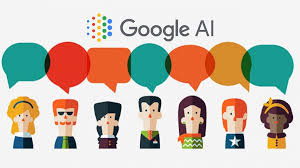

In [ ]:
#Final 1 Block Transformer which consists of 1 encoder decoder with albert embedding
import math
maxlen=500
embed_size=768


class Scaled_Dot_Product_Self_Attention(tf.keras.layers.Layer):
    #A class for Self Attention- Q,K,V dimensions
    def __init__(self,units):
        super(Scaled_Dot_Product_Self_Attention,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q,k,v,n):
        self.q=q
        self.v=v
        self.n=n
        self.k=k
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
#         self.q=tf.transpose(self.q)
        score=(self.Wq(self.q)*self.Wk(self.k))/math.sqrt(n)
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
        context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts



def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
        
def fetch_vectors(string_list,pretrained_model,batch_size=64):
    # inspired by https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
    tokenizer = AutoTokenizer.from_pretrained(pretrained_model)
    model = transformers.TFAlbertModel.from_pretrained(pretrained_model)
    
    fin_features = []
    for data in chunks(string_list, batch_size):
        tokenized = []
        for x in data:
            x = " ".join(x.strip().split()[:300])
            tok = tokenizer.encode(x, add_special_tokens=True)
            tokenized.append(tok[:512])

        max_len = 512
        #bert variants have attention id, input id and segment id
        padded = np.array([i + [0] * (max_len - len(i)) for i in tokenized])
        #This is the attention mask
        attention_mask = np.where(padded != 0, 1, 0)
        input_ids = tf.convert_to_tensor(padded)
        attention_mask = tf.convert_to_tensor(attention_mask)
        #Extract the last hidden states.
        last_hidden_states = model(input_ids, attention_mask=attention_mask)

        features = last_hidden_states[0][:, 0, :].cpu().numpy()
        fin_features.append(features)

    fin_features = np.vstack(fin_features)
    return fin_features



def albert_encoder_decoder_attention(maxlen,max_features,albert_embeddings):
    #Creating LSTM  encoder neural model with albert pretrained embeddings
    #Encoder Block
    encoder_inp=Input(shape=(maxlen,))
    encoder_embed=Embedding(albert_embeddings.shape[0],embed_size,weights=[albert_embeddings])(encoder_inp)
    print(encoder_inp.shape)
#     encoder_embed_attention=ma.MiniAttentionBlock(None,None,None,keras.regularizers.L2(l2=0.02),None,None,None,None,None)(encoder_embed)
    encoder_lstm_cell=LSTM(60,return_state='True')
    encoder_outputs,encoder_state_flstm_h,encoder_state_flstm_c=encoder_lstm_cell(encoder_embed)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')
    encoded_states=[encoder_state_flstm_h,encoder_state_flstm_c]
    
    #Creating LSTM decoder model and feeding the output states (h,c) of lstm of encoders
    #Decoder Block
    decoder_inp=Input(shape=(maxlen,))
    decoder_embed=Embedding(albert_embeddings.shape[0],embed_size,weights=[albert_embeddings])(decoder_inp)
    scaled_dot_product_attention=Scaled_Dot_Product_Self_Attention(60)
    
    decoder_embed_attention_h,decoder_embed_wghts_h=scaled_dot_product_attention(encoder_state_flstm_h,encoder_state_flstm_h,encoder_outputs,64)
    decoder_embed_attention_c,decoder_embed_wghts_c=scaled_dot_product_attention(encoder_state_flstm_c,encoder_state_flstm_c,encoder_outputs,64)
#     print(decoder_embed_wghts)
    decoder_lstm_cell=LSTM(60,return_state=True)
    decoder_outputs,decoder_state_lstm_h,decoder_state_lstm_c=decoder_lstm_cell(decoder_embed,initial_state=[decoder_embed_wghts_h,decoder_embed_wghts_c])
#     decoderoutputs,_,_=decoder_lstm_cell(decoder_embed,initial_state=encoded_states)
    
    decoder_dense_cell=Dense(16,activation='relu')
    decoder_d_output=decoder_dense_cell(decoder_outputs)
    decoder_dense_cell2=Dense(5,activation='softmax')
    decoder_output=decoder_dense_cell2(decoder_d_output)
    model=Model([encoder_inp,decoder_inp],decoder_output)
    model.summary()
    return model



#Use the method for creating albert embeddings

albert_embeddings = fetch_vectors(train_df.question_body.values,'albert-base-v1')
max_features=albert_embeddings.shape[0]
model=albert_encoder_decoder_attention(maxlen,max_features,albert_embeddings)  
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
plot_model(
    model,to_file="albert_encoder_decoder_attention.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96)
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x
val_y=train_y
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)


model.fit([train_x,train_x],train_y,batch_size=512,epochs=10,verbose=2)


## Model Architecture on Albert


The model architecture can be shown as follows:


<img src="https://i.imgur.com/ELj9zmF.png">

# Modifying the Codebase to Create a 2 Block Transformer

We will now be modifying the codebase and create a 2 block transformer architecture. Traditionally  a classical transformer is made of 8 blocks, and BERT variants have 12/24 such blocks. The most important aspect of these blocks is that only intermediate hidden cell states (h) get communicated . So between each encoder block we can keep an attention block to modify the internal h states of the LSTM stacks . Similarly between each decoder we can create a transmission of the hidden h states of the decoder cells.

This looks like the image shown below:

<img src="http://jalammar.github.io/images/t/transformer_resideual_layer_norm_3.png">

In [ ]:


class Scaled_Dot_Product_Self_Attention(tf.keras.layers.Layer):
    #A class for Self Attention- Q,K,V dimensions
    def __init__(self,units):
        super(Scaled_Dot_Product_Self_Attention,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q,k,v,n):
        self.q=q
        self.v=v
        self.n=n
        self.k=k
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
#         self.q=tf.transpose(self.q)
        score=(self.Wq(self.q)*self.Wk(self.k))/math.sqrt(n)
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
        context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts



def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
        
def fetch_vectors(string_list,pretrained_model,batch_size=64):
    # inspired by https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
    tokenizer = AutoTokenizer.from_pretrained(pretrained_model)
    model = transformers.TFAlbertModel.from_pretrained(pretrained_model)
    
    fin_features = []
    for data in chunks(string_list, batch_size):
        tokenized = []
        for x in data:
            x = " ".join(x.strip().split()[:300])
            tok = tokenizer.encode(x, add_special_tokens=True)
            tokenized.append(tok[:512])

        max_len = 512
        #bert variants have attention id, input id and segment id
        padded = np.array([i + [0] * (max_len - len(i)) for i in tokenized])
        #This is the attention mask
        attention_mask = np.where(padded != 0, 1, 0)
        input_ids = tf.convert_to_tensor(padded)
        attention_mask = tf.convert_to_tensor(attention_mask)
        #Extract the last hidden states.
        last_hidden_states = model(input_ids, attention_mask=attention_mask)

        features = last_hidden_states[0][:, 0, :].cpu().numpy()
        fin_features.append(features)

    fin_features = np.vstack(fin_features)
    return fin_features




def albert_encoder_decoder_attention(maxlen,max_features,albert_embeddings):
    #Creating LSTM  encoder neural model with distilbert pretrained embeddings
    #Encoder Block-I
    encoder_inp=Input(shape=(maxlen,))
    encoder_embed=Embedding(albert_embeddings.shape[0],embed_size,weights=[albert_embeddings])(encoder_inp)
    print(encoder_inp.shape)
    encoder_lstm_cell=LSTM(60,return_state='True')
    encoder_outputs,encoder_state_flstm_h,encoder_state_flstm_c=encoder_lstm_cell(encoder_embed)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')
    encoded_states=[encoder_state_flstm_h,encoder_state_flstm_c]
    
    #Encoder Block -II
#     encoder_inp_2=Input(shape=(maxlen,))
#     encoder_embed_2=Embedding(albert_embeddings.shape[0],embed_size,weights=[albert_embeddings])(encoder_inp_2)
    scaled_dot_product_attention=Scaled_Dot_Product_Self_Attention(60)
    
    encoder_embed_attention_h,encoder_embed_wghts_h=scaled_dot_product_attention(encoder_state_flstm_h,encoder_state_flstm_h,encoder_outputs,64)
    encoder_embed_attention_c,encoder_embed_wghts_c=scaled_dot_product_attention(encoder_state_flstm_c,encoder_state_flstm_c,encoder_outputs,64)
    encoder_lstm_cell_2=LSTM(60,return_sequences='True',return_state=True)
    encoder_outputs_2,encoder_state_lstm_h,encoder_state_lstm_c=encoder_lstm_cell_2(encoder_embed,initial_state=[encoder_embed_wghts_h,encoder_embed_wghts_c])
    print(f'Second Encoder Ouputs Shape{encoder_outputs.shape}')
    
    
    #Decoder Block - I
    decoder_inp=Input(shape=(maxlen,))
    decoder_embed=Embedding(albert_embeddings.shape[0],embed_size,weights=[albert_embeddings])(decoder_inp)
    scaled_dot_product_attention=Scaled_Dot_Product_Self_Attention(60)
    decoder_embed_attention_h,decoder_embed_wghts_h=scaled_dot_product_attention(encoder_state_flstm_h,encoder_state_flstm_h,encoder_outputs_2,64)
    decoder_embed_attention_c,decoder_embed_wghts_c=scaled_dot_product_attention(encoder_state_flstm_c,encoder_state_flstm_c,encoder_outputs_2,64)
    decoder_lstm_cell=LSTM(60,return_sequences='True',return_state=True)
    decoder_outputs,decoder_state_lstm_h,decoder_state_lstm_c=decoder_lstm_cell(decoder_embed,initial_state=[decoder_embed_wghts_h,decoder_embed_wghts_c])
    
    #Decoder Block - II
#     decoder_inp=Input(shape=(maxlen,))
#     decoder_embed=Embedding(albert_embeddings.shape[0],embed_size,weights=[albert_embeddings])(decoder_inp)
    scaled_dot_product_attention=Scaled_Dot_Product_Self_Attention(60)
    decoder_embed_attention_h,decoder_embed_wghts_h=scaled_dot_product_attention(decoder_state_lstm_h,decoder_state_lstm_h,decoder_outputs,64)
    decoder_embed_attention_c,decoder_embed_wghts_c=scaled_dot_product_attention(decoder_state_lstm_c,decoder_state_lstm_c,decoder_outputs,64)
    decoder_lstm_cell_2=LSTM(60,return_state=True)
    decoder_outputs_2,decoder_state_lstm_h,decoder_state_lstm_c=decoder_lstm_cell_2(decoder_embed,initial_state=[decoder_embed_wghts_h,decoder_embed_wghts_c])
    
    #Final FFNN - Dense Layer
    decoder_dense_cell=Dense(16,activation='relu')
    decoder_d_output=decoder_dense_cell(decoder_outputs_2)
    decoder_dense_cell2=Dense(5,activation='softmax')
    decoder_output=decoder_dense_cell2(decoder_d_output)
    model=Model([encoder_inp,decoder_inp],decoder_output)
    model.summary()
    return model


maxlen=500
embed_size=768
#Use the method for creating  embeddings
albert_embeddings = fetch_vectors(train_df.question_body.values,'albert-base-v1')

model=albert_encoder_decoder_attention(maxlen,max_features,albert_embeddings)  
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
plot_model(
    model,to_file="albert_encoder_decoder_attention_II.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96)

model.fit([train_x,train_x],train_y,batch_size=512,epochs=10,verbose=2)


## Model Architecture of 2 Block Transformer with Albert Embeddings


The model architecture can be defined as follows:


<img src="https://i.imgur.com/6Jn2xz7.png">

# Conclusion of Transformers 

In this case, we saw and built a 2Block transformer with intermediate Albert Embeddings (quite complex) along with Self Attention multiple times (Multi head self attention). And there are many other ways to build a classifier, and [this Kernel](https://www.kaggle.com/abhilash1910/nlp-workshop-2-ml-india) provides a good overview of creating another high performant Classifier using TPU Cluster (Google Cloud Storage) in Kaggle.With the help of Huggingface we can create any language model for any NLP tasks. Now we will be looking into a classic example of creating answers from a given context with a QA Transformer model.

# Question Answering with Transformers Pipeline



<img src="https://huggingface.co/front/assets/huggingface_logo.svg">


[HuggingFace Pipelines](https://huggingface.co/transformers/main_classes/pipelines.html) are extensively used in any language modelling tasks from NER, to QA, MNLI  or even Summarisation. The pipeline is built to be robust and very efficient to handle the different downstream tasks from a transformer model. Once the embeddings are received from a Transformer model, the downstream tasks can be solved very simply by taking those tokenized embeddings and solving it for our downstream tasks. Particularly in the context of question answering this is done by using some segment tokens (tagging questions with tag 1 and answers with tag 0). Here we will be looking how to build a simple pipeline to extract answers from a given context when questions are provided.


In [ ]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering,pipeline

tokenizer = AutoTokenizer.from_pretrained("abhilash1910/distilbert-squadv1")
model = AutoModelForQuestionAnswering.from_pretrained("abhilash1910/distilbert-squadv1")
context=train_df['answer'][2]
print('The context:',context)
question='What is the thickness of the boards?'
qa_pipeline=pipeline('question-answering',model=model,tokenizer=tokenizer)
qa_inputs={
    'question':question,
    'context':context
}
final_container=qa_pipeline(qa_inputs)
print('The final answer: ',final_container['answer'])
print('The corresponding score: ',final_container['score'])


## A Detailed Example From Huggingface

This provides a detailed overview of using [Huggingface Library](https://huggingface.co/transformers/usage.html) for creating a QA model. Here the following steps are to be followed:


- Tokenize the context and questions.Special Tokens can be added as well
- After the tokenization is completed, we have to convert the encoded tokens to ids
- Pass these ids (segment ids) into the Transformer model to extract the last embedding output
- Collect the start and end scores from the model output
- Understand the corresponding ids which are present in those ranges
- Convert those ids back into tokens (words)
- These converted tokens gives the answer

Some important points:

- We only consider ourselves with the segment tokens. In the case of BERT, there are 3 such tokens- inputs, position and segments 
- Masking of tokens is optional and can be used
- For QA models BERT variants perform really well as opposed to GPT variants.

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForQuestionAnswering
import tensorflow as tf

tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = TFAutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

text = r"""
🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose
architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural
Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between
TensorFlow 2.0 and PyTorch.
"""

questions = [
    "How many pretrained models are available in Transformers?",
    "What does Transformers provide?",
    "Transformers provides interoperability between which frameworks?",
]

for question in questions:
    inputs = tokenizer.encode_plus(question, text, add_special_tokens=True, return_tensors="tf")
    input_ids = inputs["input_ids"].numpy()[0]

    text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    answer_start_scores, answer_end_scores = model(inputs)

    answer_start = tf.argmax(
        answer_start_scores, axis=1
    ).numpy()[0]  # Get the most likely beginning of answer with the argmax of the score
    answer_end = (
        tf.argmax(answer_end_scores, axis=1) + 1
    ).numpy()[0]  # Get the most likely end of answer with the argmax of the score
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

    print(f"Question: {question}")
    print(f"Answer: {answer}\n")

# Creating an NER pipeline with Transformers

Using the huggingface pipeline we can create finetune our models for downstream tasks as well. We use the same code example as in the question answer model (using pipeline).There are many ways to do this:

- We can use the pipeline ('ner') as it is
- We can also use any models , and for that we can specify model name and tokenizer name from huggingface (same as in the QA example)



In [ ]:

#Without using any specific model as such
ner_pipeline=pipeline('ner')
context=train_df['answer'][100]
print('Context',context)
print('NER tagging of the sample')
print(ner_pipeline(context))

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(ner_results)

# Conclusion of Session

We have come to the end of the session, abd we have explored many things from the basics of neural networks to creating an advanced architecture . Also we have explored the different world of embeddings,created our SOTA Transformer models with embeddings. We also saw how to create a 2 block Transformer, and saw the different downstream tasks like QA modelling and NER where Transformers can be used so easily. There are lots of concepts in Transformers which have not yet been covered but this provides a gentle introduction how to scale a simple neural network to a Transformer.


<img src="https://media.tenor.com/images/cfbe42db018b64c9806a6b4ae89f3f2c/tenor.gif">